In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Generate synthetic data
np.random.seed(42)
num_samples = 4500

income = np.random.normal(50000, 15000, num_samples)
savings = np.random.normal(10000, 5000, num_samples)
subscribed_to_marketing = np.random.choice([0, 1], num_samples)
age = np.random.randint(20, 60, num_samples)
work_experience_years = np.random.randint(1, 20, num_samples)
credit_score = np.random.normal(700, 50, num_samples).astype(int)

# Target variable
purchase = (income + savings + np.random.randn(num_samples) * 10000 + 5000 * subscribed_to_marketing) > 70000
purchase = purchase.astype(int)

# Create a DataFrame
data = pd.DataFrame({
    'income': income,
    'savings': savings,
    'subscribed_to_marketing': subscribed_to_marketing,
    'age': age,
    'work_experience_years': work_experience_years,
    'credit_score': credit_score,
    'purchase': purchase
})

data.head()

,income,savings,subscribed_to_marketing,age,work_experience_years,credit_score,purchase
0,57450.712295,5206.107719,0,21,2,720,0
1,47926.035482,3237.456553,1,35,6,649,0
2,59715.328072,2082.058051,0,38,14,759,0
3,72845.447846,12064.994561,0,53,7,681,1
4,46487.699379,8929.661511,1,33,2,746,0


In [3]:
def set_features_and_target(df):
    '''
    Returns two data frames with features and target variables.
            Parameters:
                    df (str): Pandas dataframe
    '''
    X = df.drop(['purchase'], axis=1)
    y = df['purchase']
    
    return X,y
                 
X,y = set_features_and_target(data)
print(X.shape, y.shape)

(4500, 6) (4500,)


In [4]:
def train_test_split_df(X,y):
    '''
    Creates train and test split.

    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_df(X,y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3150, 6) (3150,)
(1350, 6) (1350,)


In [5]:
def model_application(X_train, y_train):
    lr_clf = LogisticRegression(max_iter=100)
    lr_clf.fit(X_train, y_train)

    return lr_clf

lr_clf = model_application(X_train, y_train)

In [6]:
def model_predict(X_test):
    y_pred = lr_clf.predict(X_test)
    
    return y_pred

y_pred = model_predict(X_test)
print('Training Accuracy Score(%):',lr_clf.score(X_train,y_train)*100)
print('Test Accuracy Score(%):',lr_clf.score(X_test,y_test)*100)

Training Accuracy Score(%): 81.68253968253968
Test Accuracy Score(%): 80.96296296296296


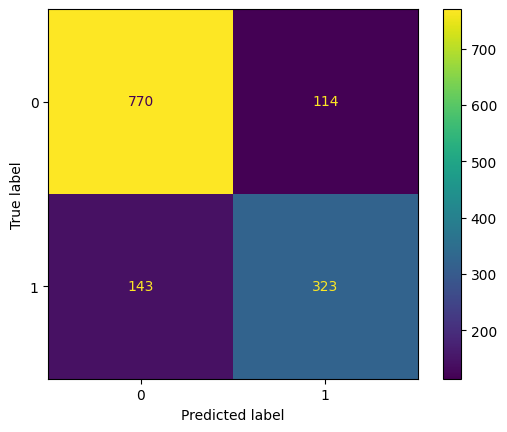

array([[770, 114],
       [143, 323]])

In [7]:
def generate_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred, labels=lr_clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_clf.classes_)
    disp.plot()
    plt.grid(False) 
    plt.show()
    
    return cm

generate_confusion_matrix(y_test, y_pred)

In [8]:
def generate_perfomance_metrics(y_test,y_pred):
    rf_model_score = accuracy_score(y_test, y_pred)
    print('Model Accuracy:', rf_model_score)
    return print('Classification Report:\n', classification_report(y_test, y_pred))

generate_perfomance_metrics(y_test,y_pred)

Model Accuracy: 0.8096296296296296
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       884
           1       0.74      0.69      0.72       466

    accuracy                           0.81      1350
   macro avg       0.79      0.78      0.79      1350
weighted avg       0.81      0.81      0.81      1350



In [13]:
def save_model(model, filename='predict_purchase_model.pkl', folder='/path/to/save/model/'):
    if not os.path.exists(folder):
        os.makedirs(folder)
        
    file_path = os.path.join(folder, filename)
    joblib.dump(model, file_path)
    print(f'Model saved to {file_path}')

# Save the logistic regression model
save_model(lr_clf)


OSError: [Errno 30] Read-only file system: '/path'